# Imports

In [1]:
! pip install pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_DATASET_PATH = "../datasets/meds_train_alunos.csv"
TEST_DATASET_PATH = "../datasets/meds_test_alunos.csv"
BTS_DATASET = "../datasets/Bts.csv"
IMG_PATH = "imgs/"

# Definindo funções

In [2]:
def boxplot(data:pd.DataFrame, title:str, xlabel:str="", ylabel:str="", figsize:tuple=(10,7), filename:str="") -> None:
    _, ax = plt.subplots(figsize = figsize)
    sns.boxplot(data=data, orient="h", palette="Set2")
    ax.set_title(title)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    plt.tight_layout()
    if filename:
        plt.savefig(filename)

    plt.show()

In [18]:
def histogram(data:pd.DataFrame, title:str=None, grid_columns:int=3, filename:str="") -> None:
    num_cols = len(data.columns)
    grid_rows = (num_cols + grid_columns - 1) // grid_columns
    
    plt.figure(figsize=(18, 4 * grid_rows))
    
    for i, col in enumerate(data.columns):
        plt.subplot(grid_rows, grid_columns, i + 1)
        sns.histplot(data[col], kde=True)
        plt.title(f"Histograma de {col}")
    
    if title:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.001, 1, .98])
    if filename:
        plt.savefig(filename)

    plt.show()


In [4]:
def plot_covariance_heatmap(covariance_matrix: list, title:str='Matriz de Covariância', filename:str=""):
    plt.figure(figsize=(10, 8))
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
        
    plt.show()

# Analisando Dataset de treino

In [5]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.27,4.0,7.0,2.0,-8.050390,-34.959630,False
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6775 entries, 0 to 6774
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ponto_id  6775 non-null   int64  
 1   rssi_1_1  6775 non-null   float64
 2   rssi_1_2  6775 non-null   float64
 3   rssi_1_3  6775 non-null   float64
 4   rssi_2_1  6775 non-null   float64
 5   rssi_2_2  6775 non-null   float64
 6   rssi_2_3  6775 non-null   float64
 7   rssi_3_1  6775 non-null   float64
 8   rssi_3_2  6775 non-null   float64
 9   rssi_3_3  6775 non-null   float64
 10  delay_1   6775 non-null   float64
 11  delay_2   6775 non-null   float64
 12  delay_3   6775 non-null   float64
 13  lat       6775 non-null   float64
 14  lon       6775 non-null   float64
 15  indoor    6775 non-null   bool   
dtypes: bool(1), float64(14), int64(1)
memory usage: 800.7 KB


In [7]:
df.describe()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,4856.099779,-100.789923,-105.688802,-100.545198,-103.524786,-97.210290,-97.193499,-93.644749,-93.353728,-107.478361,4.679410,3.159262,2.504945,-8.054510,-34.951792
std,2785.645694,10.025728,10.397924,9.968138,13.367328,8.853480,9.992950,7.688089,8.110877,11.003407,0.911469,1.009927,1.095094,0.002388,0.002310
min,1.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.140000,-115.630000,-115.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850
25%,2434.500000,-107.650000,-115.000000,-107.148571,-115.000000,-102.202857,-101.652857,-99.480000,-99.005000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,4875.000000,-103.040000,-110.425000,-99.750000,-108.430000,-97.170000,-95.615714,-94.785000,-95.688000,-115.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597
75%,7272.500000,-93.455000,-97.350000,-93.340000,-96.817917,-92.080000,-91.951429,-89.375000,-89.610500,-97.600000,5.000000,3.000000,3.000000,-8.055310,-34.951331
max,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.046420,-34.945110


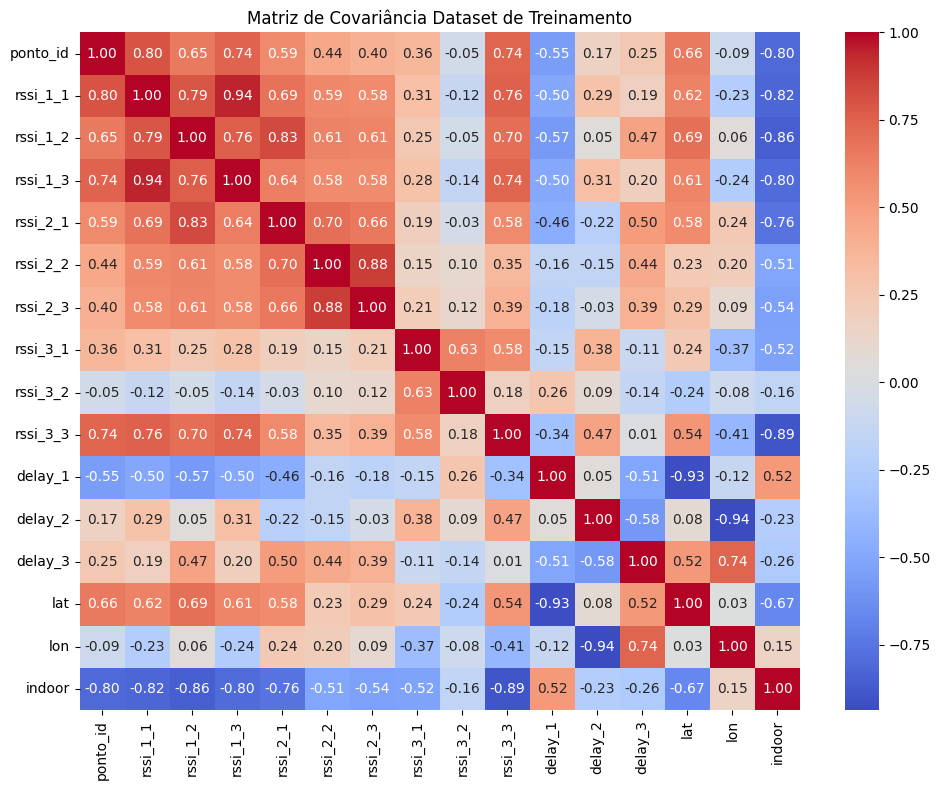

In [8]:
plot_covariance_heatmap(df.corr(),title="Matriz de Covariância Dataset de Treinamento", filename=f'{IMG_PATH}/matriz_cov.png')

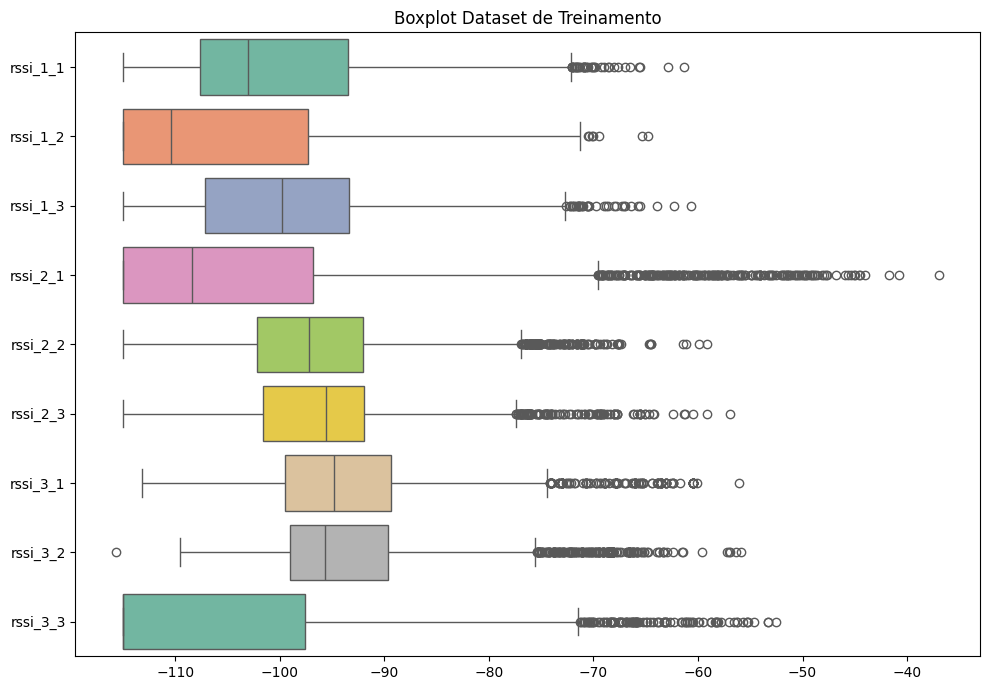

In [10]:
boxplot(df.drop(["ponto_id", "lat", "lon", "delay_1", "delay_2", "delay_3", "indoor"], axis=1), "Boxplot Dataset de Treinamento", filename=f"{IMG_PATH}/boxplot_treinamento_rssi.png")

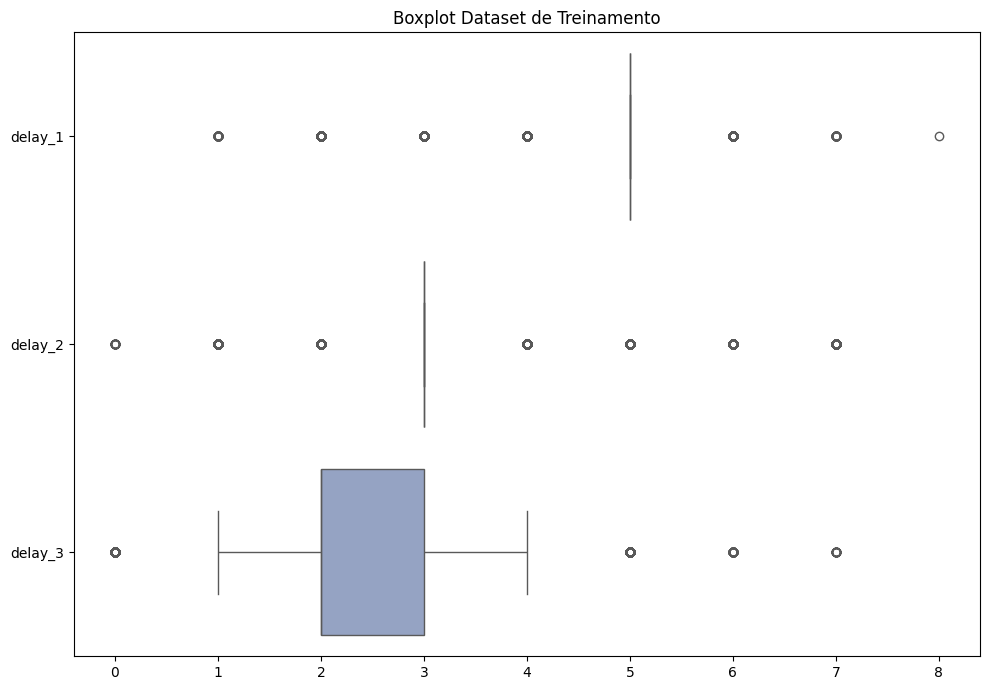

In [11]:
boxplot(df[["delay_1", "delay_2", "delay_3"]], "Boxplot Dataset de Treinamento", filename=f"{IMG_PATH}/boxplot_treinamento_rssi.png")

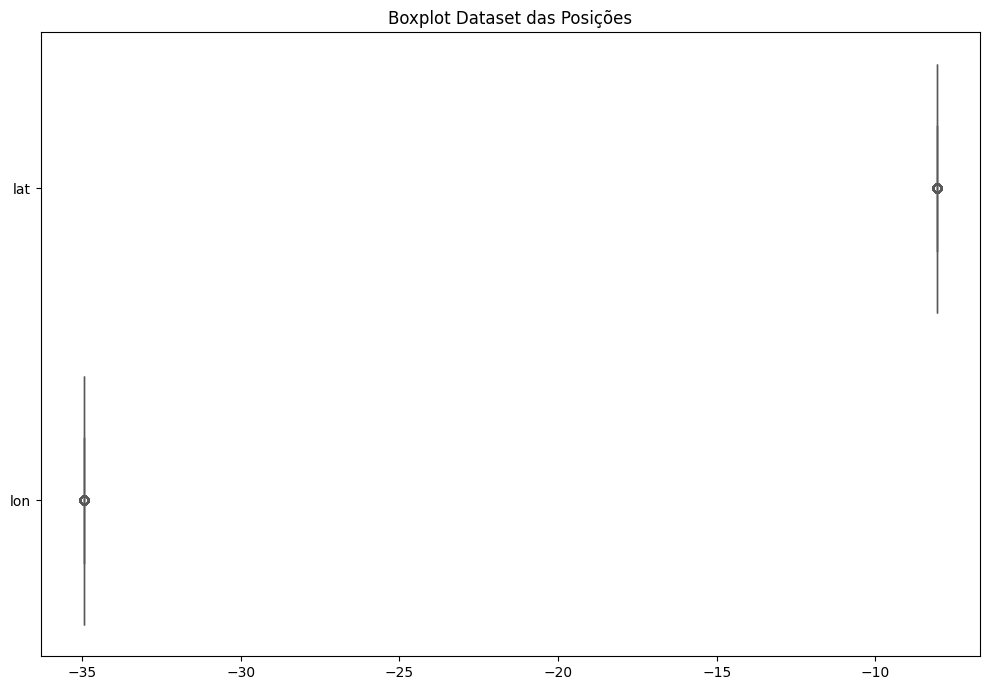

In [22]:
boxplot(df[["lat", "lon"]], "Boxplot Dataset das Posições", filename=f"{IMG_PATH}/boxplot_treinamento_pos.png")

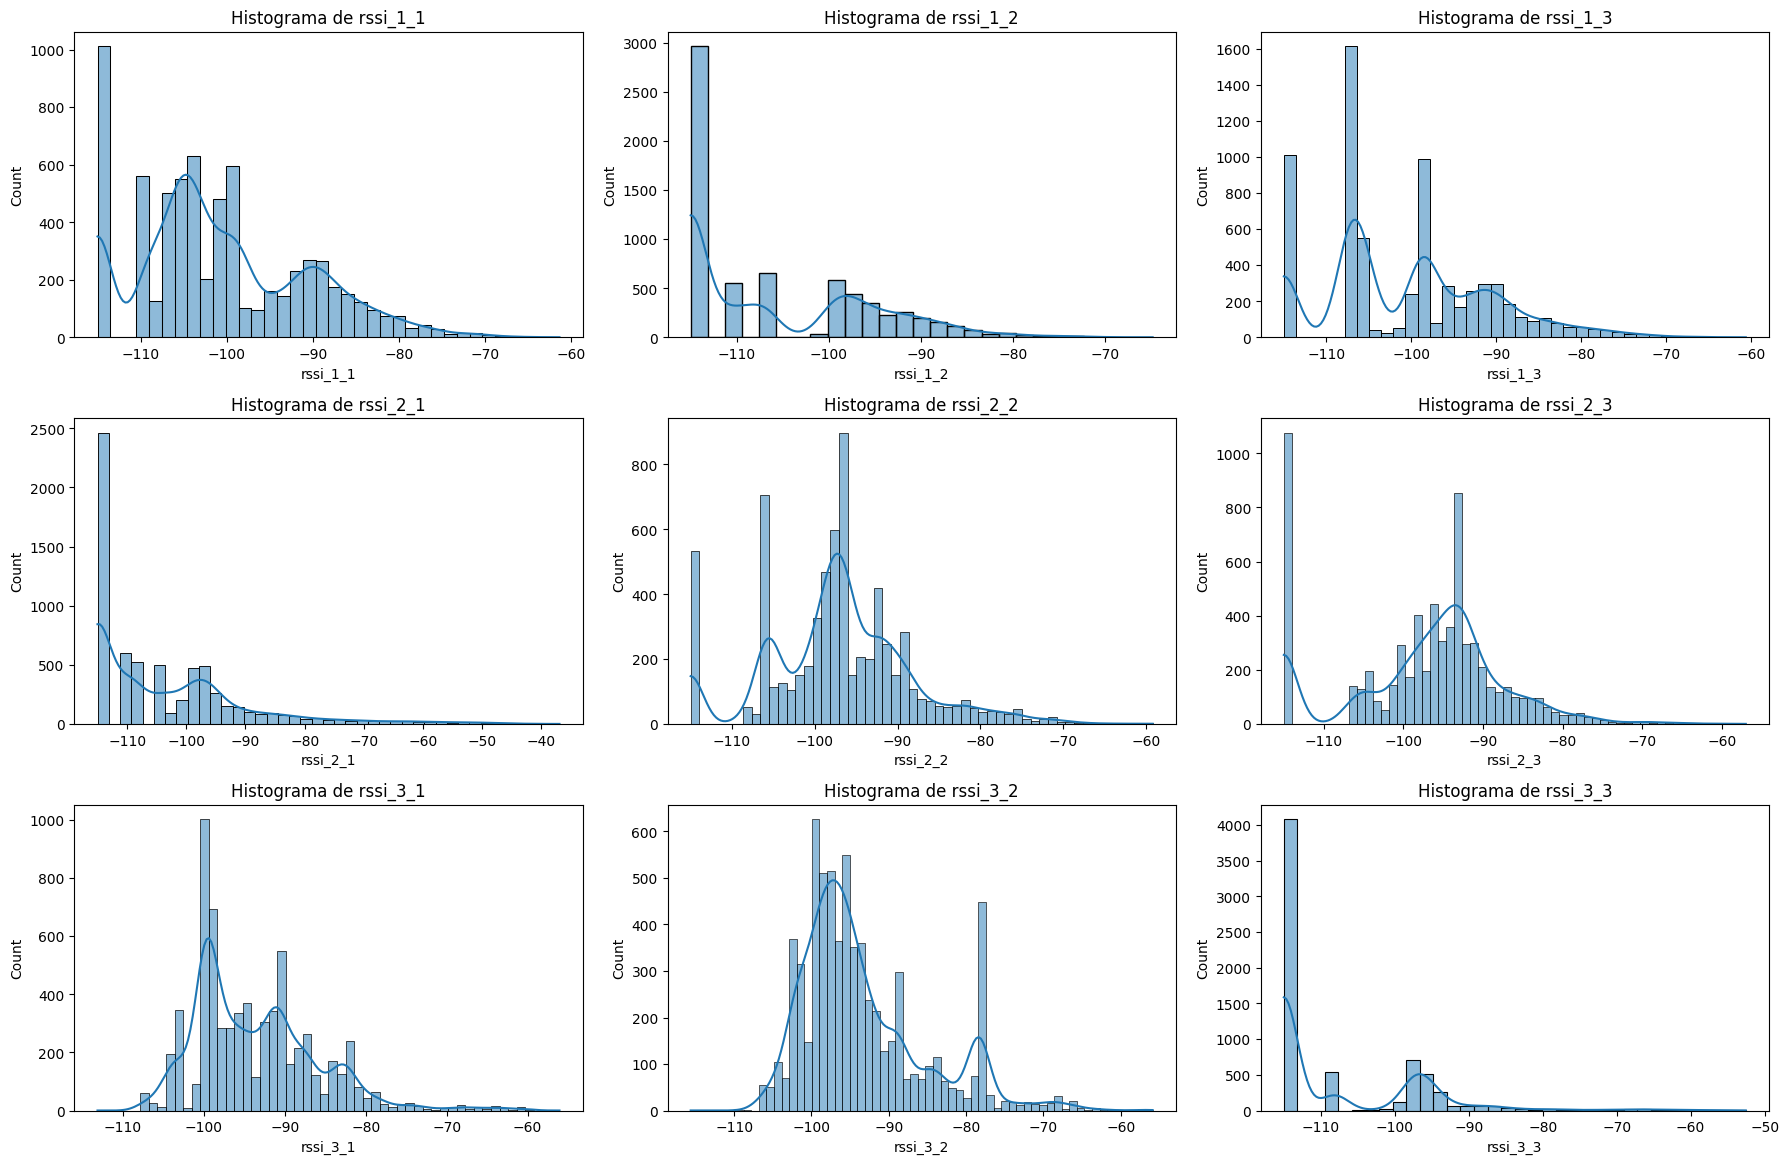

In [23]:
histogram(df.drop(["ponto_id", "lat", "lon", "delay_1", "delay_2", "delay_3", "indoor"], axis=1), filename=F"{IMG_PATH}/hist_train_rssi.png")

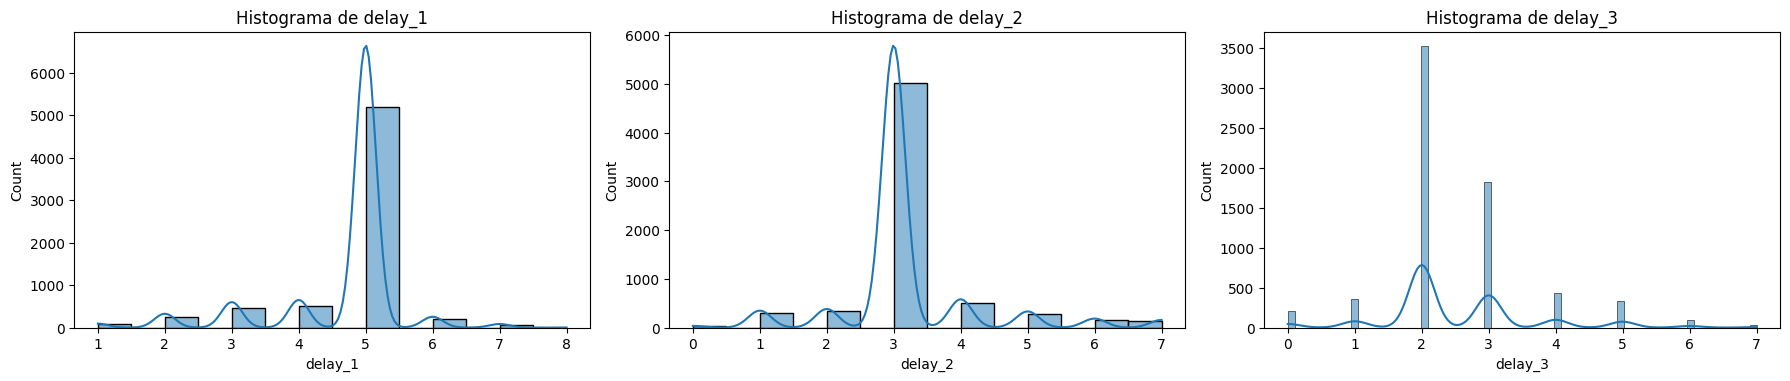

In [19]:
histogram(df[["delay_1", "delay_2", "delay_3"]], filename=F"{IMG_PATH}/hist_train_delay.png")

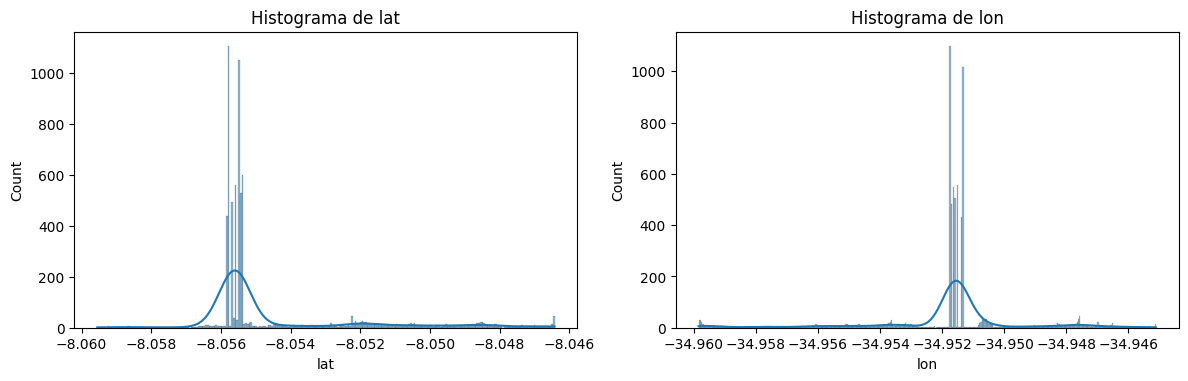

In [20]:
histogram(df[["lat", "lon"]], filename=F"{IMG_PATH}/hist_train_pos.png")

# Analisando Dataset de teste

In [36]:
df = pd.read_csv(TEST_DATASET_PATH)
df.head()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3
0,0,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-90.93,-84.113333,-115.0,5.0,3.0,2.0
1,3,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-90.93,-84.113333,-115.0,5.0,3.0,2.0
2,8,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-90.93,-86.090000,-115.0,5.0,3.0,2.0
3,10,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-90.93,-84.113333,-115.0,5.0,3.0,2.0
4,12,-115.0,-115.0,-115.0,-115.0,-115.0,-115.0,-90.93,-84.113333,-115.0,5.0,3.0,2.0


In [37]:
num_duplicatas = df.duplicated().sum()

print("Número de duplicatas no dataset:", num_duplicatas)

Número de duplicatas no dataset: 0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ponto_id  2904 non-null   int64  
 1   rssi_1_1  2904 non-null   float64
 2   rssi_1_2  2904 non-null   float64
 3   rssi_1_3  2904 non-null   float64
 4   rssi_2_1  2904 non-null   float64
 5   rssi_2_2  2904 non-null   float64
 6   rssi_2_3  2904 non-null   float64
 7   rssi_3_1  2904 non-null   float64
 8   rssi_3_2  2904 non-null   float64
 9   rssi_3_3  2904 non-null   float64
 10  delay_1   2904 non-null   float64
 11  delay_2   2904 non-null   float64
 12  delay_3   2904 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 295.1 KB


In [26]:
df.describe()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,4799.106405,-100.991875,-105.885008,-100.685644,-103.411642,-97.397221,-97.361075,-93.790210,-93.232673,-107.604530,4.676653,3.121901,2.535124
std,2814.236124,9.933416,10.417400,9.978536,13.990015,9.208718,10.256866,7.553796,8.225281,10.960141,0.928623,1.002726,1.134803
min,0.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.300000,-114.420000,-115.000000,1.000000,0.000000,0.000000
25%,2361.000000,-107.650000,-115.000000,-107.148571,-115.000000,-103.315000,-102.440000,-99.380000,-98.787500,-115.000000,5.000000,3.000000,2.000000
50%,4765.500000,-103.040000,-110.425000,-99.750000,-108.430000,-97.200000,-95.615714,-95.140000,-95.518000,-115.000000,5.000000,3.000000,2.000000
75%,7210.250000,-93.675357,-97.350000,-93.592857,-96.550000,-91.935000,-92.347679,-89.777917,-89.132857,-97.600000,5.000000,3.000000,3.000000
max,9678.000000,-65.330000,-66.320000,-65.140000,-41.150000,-55.550000,-58.860000,-52.690000,-56.620000,-50.100000,7.000000,7.000000,7.000000


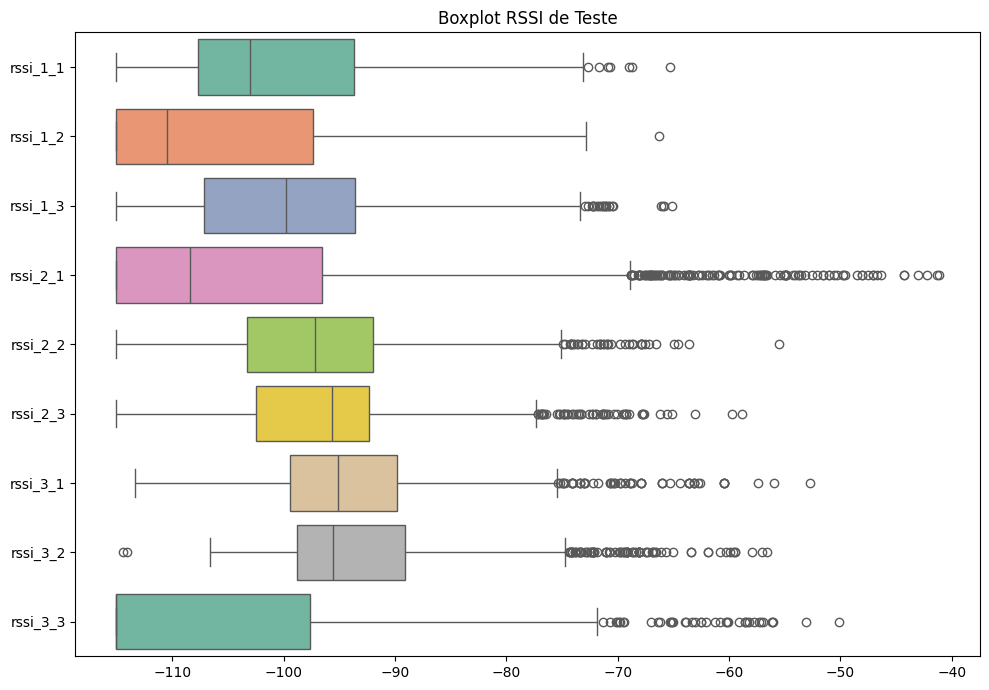

In [29]:
boxplot(df.drop(["ponto_id", "delay_1", "delay_2", "delay_3"], axis=1), "Boxplot RSSI de Teste")

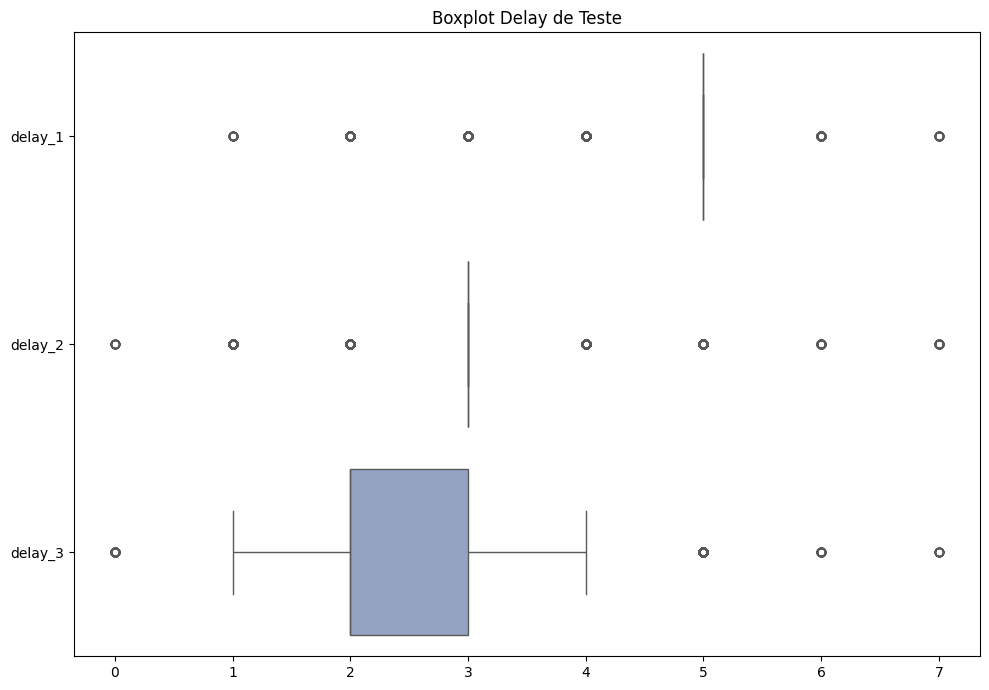

In [30]:
boxplot(df[["delay_1", "delay_2", "delay_3"]], "Boxplot Delay de Teste")

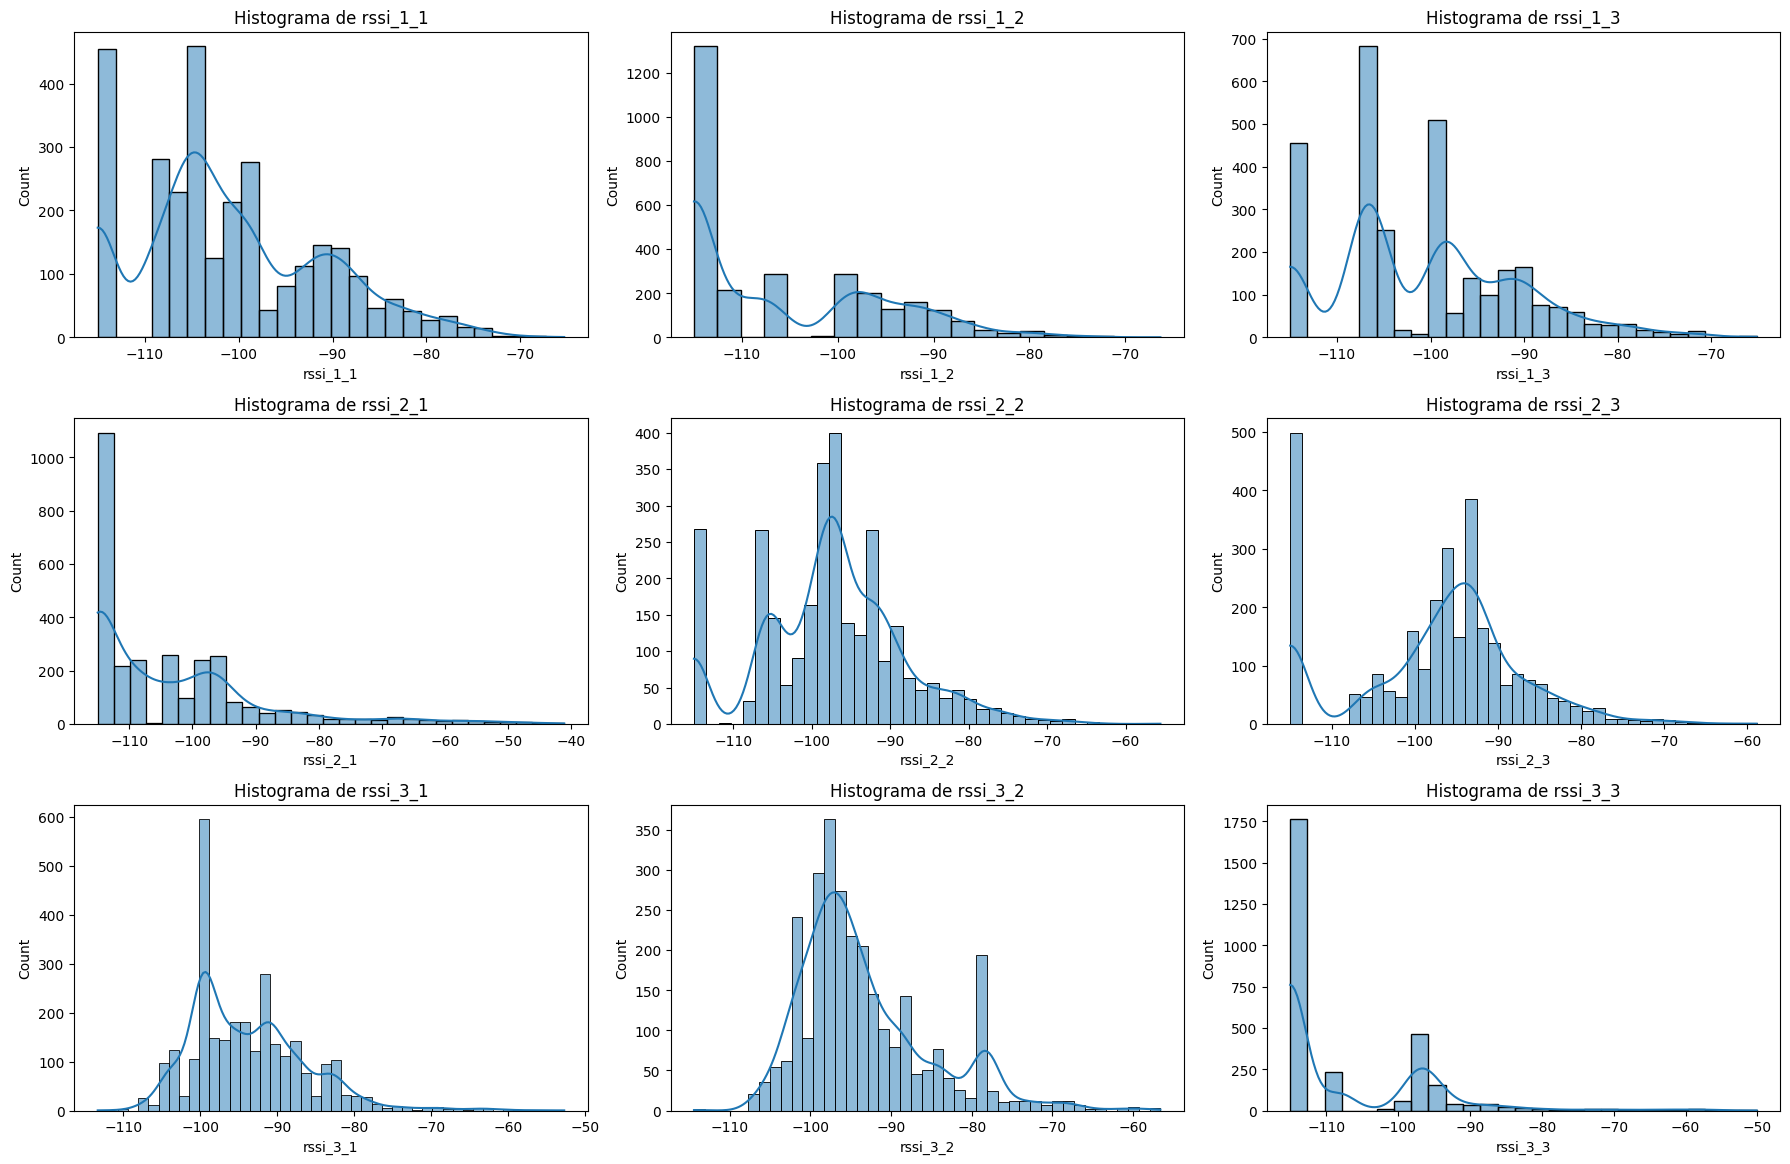

In [32]:
histogram(df.drop(["ponto_id", "delay_1", "delay_2", "delay_3"], axis=1))

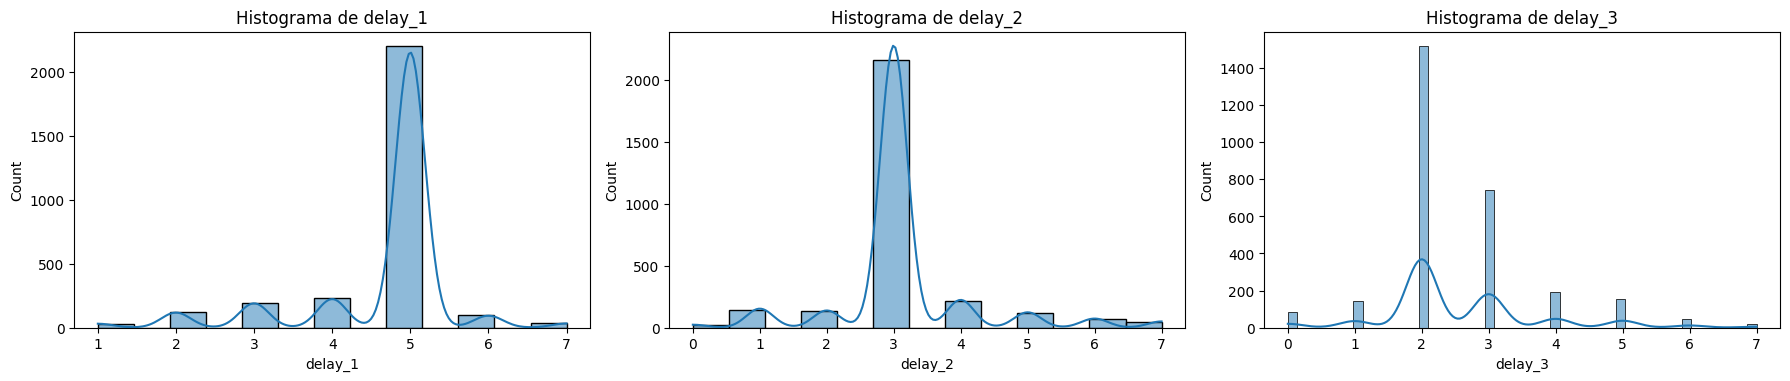

In [34]:
histogram(df[["delay_1", "delay_2", "delay_3"]])

# Analisando Dataset BTS

In [17]:
df = pd.read_csv(BTS_DATASET) # apenas 9 entradas, logo nenhuma análise estatística será feita
df.head(10)

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952000,873,0,rssi_1_1
1,1,BTS_1_2,PEMDL01_2,-8.04342,-34.952000,872,120,rssi_1_2
2,1,BTS_1_3,PEMDL01_3,-8.04342,-34.952000,875,240,rssi_1_3
3,2,BTS_2_1,PEMDL08_1,-8.05289,-34.944672,865,0,rssi_2_1
4,2,BTS_2_2,PEMDL08_2,-8.05289,-34.944672,874,120,rssi_2_2
5,2,BTS_2_3,PEMDL08_3,-8.05289,-34.944672,871,240,rssi_2_3
6,3,BTS_3_1,PEMDL09_1,-8.05532,-34.957900,877,0,rssi_3_1
7,3,BTS_3_2,PEMDL09_2,-8.05532,-34.957900,881,120,rssi_3_2
8,3,BTS_3_3,PEMDL09_3,-8.05532,-34.957900,869,240,rssi_3_3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grupo       9 non-null      int64  
 1   btsId       9 non-null      object 
 2   btsNetNome  9 non-null      object 
 3   lat         9 non-null      float64
 4   lon         9 non-null      float64
 5   cch         9 non-null      int64  
 6   azimuth     9 non-null      int64  
 7   RssiId      9 non-null      object 
dtypes: float64(2), int64(3), object(3)
memory usage: 704.0+ bytes
